# 0. Source the needed packages


In [1]:
install.packages("xlsx")
install.packages("gdata")
install.packages("ape")

Installing package into 'C:/Users/Tania/Documents/R/win-library/3.3'
(as 'lib' is unspecified)


ERROR: Error in contrib.url(repos, "source"): trying to use CRAN without setting a mirror


In [5]:
source("http://bioconductor.org/biocLite.R")
biocLite("multtest")

Bioconductor version 3.4 (BiocInstaller 1.24.0), ?biocLite for help
BioC_mirror: https://bioconductor.org
Using Bioconductor 3.4 (BiocInstaller 1.24.0), R 3.3.2 (2016-10-31).
Installing package(s) 'multtest'


package 'multtest' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Tania\AppData\Local\Temp\RtmpmySu5l\downloaded_packages


installation path not writeable, unable to update packages: cluster, Matrix,
  mgcv, nlme, survival
Old packages: 'stringi'


# 1. Exploratory data analysis

We will be usig the Gene Expression dataset from Golub et al (1999).

Gene expression data (3051 genes and 38 tumor mRNA samples) from the leukemia microarray study of Golub et al. (1999). Pre-processing was done as described in Dudoit et al. (2002). The R code for pre-processing is available in the file ../doc/golub.R.

**Source**: 
Golub et al. (1999). Molecular classification of cancer: class discovery and class prediction by gene expression monitoring, Science, Vol. 286:531-537. http://www-genome.wi.mit.edu/MPR/ .

In [6]:
require(multtest)

# Usage
data(golub)

# If you need more information on the data set just
# uncomment the line below
# ?golub

Loading required package: multtest
Loading required package: BiocGenerics
Loading required package: parallel

Attaching package: 'BiocGenerics'

The following objects are masked from 'package:parallel':

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB

The following objects are masked from 'package:stats':

    IQR, mad, xtabs

The following objects are masked from 'package:base':

    anyDuplicated, append, as.data.frame, cbind, colnames, do.call,
    duplicated, eval, evalq, Filter, Find, get, grep, grepl, intersect,
    is.unsorted, lapply, lengths, Map, mapply, match, mget, order,
    paste, pmax, pmax.int, pmin, pmin.int, Position, rank, rbind,
    Reduce, rownames, sapply, setdiff, sort, table, tapply, union,
    unique, unsplit, which, which.max, which.min

Loading required package: Biobase
Welcome to Bioconductor

    Vignettes contain introductory mate

Data set values:
- `golub`: matrix of gene expression levels for the 38 tumor mRNA samples, rows correspond to genes (3051 genes) and columns to mRNA samples.
- `golub.cl`: numeric vector indicating the tumor class, 27 acute lymphoblastic leukemia (ALL) cases (code 0) and 11 acute myeloid leukemia (AML) cases (code 1).
- `golub.names`: a matrix containing the names of the 3051 genes for the expression matrix golub. The three columns correspond to the gene index, ID, and Name, respectively.

In [7]:
# Checking the dimension of the data
dim(golub)

[1] 3051   38

In [8]:
# we will have a look at the first rows contained in the data set
head(golub)

-1.45769,-1.39420,-1.42779,-1.40715,-1.42668,-1.21719,-1.37386,-1.36832,-1.47649,-1.21583,...,-1.08902,-1.29865,-1.26183,-1.44434,1.10147,-1.34158,-1.22961,-0.75919,0.84905,-0.66465
-0.75161,-1.26278,-0.09052,-0.99596,-1.24245,-0.69242,-1.37386,-0.50803,-1.04533,-0.81257,...,-1.08902,-1.05094,-1.26183,-1.25918,0.97813,-0.79357,-1.22961,-0.71792,0.45127,-0.45804
0.45695,-0.09654,0.90325,-0.07194,0.03232,0.09713,-0.11978,0.23381,0.23987,0.44201,...,-0.43377,-0.10823,-0.29385,0.05067,1.69430,-0.12472,0.04609,0.24347,0.90774,0.46509
3.13533,0.21415,2.08754,2.23467,0.93811,2.24089,3.36576,1.97859,2.66468,-1.21583,...,0.29598,-1.29865,2.76869,2.08960,0.70003,0.13854,1.75908,0.06151,1.30297,0.58186
2.76569,-1.27045,1.60433,1.53182,1.63728,1.85697,3.01847,1.12853,2.17016,-1.21583,...,-1.08902,-1.29865,2.00518,1.17454,-1.47218,-1.34158,1.55086,-1.18107,1.01596,0.15788
2.64342,1.01416,1.70477,1.63845,-0.36075,1.73451,3.36576,0.96870,2.72368,-1.21583,...,-1.08902,-1.29865,1.73780,0.89347,-0.52883,-1.22168,0.90832,-1.39906,0.51266,1.36249


In [10]:
# Adding 3051 gene names
row.names(golub) = golub.gnames[,3]

In [11]:
# Numeric vector indicating the tumor class, 27 acute lymphoblastic leukemia (ALL) 
# cases (code 0) and 11 acute myeloid leukemia (AML) cases (code 1).
colnames(golub) = golub.cl

head(golub)

,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
AFFX-HUMISGF3A/M97935_MA_at,-1.45769,-1.39420,-1.42779,-1.40715,-1.42668,-1.21719,-1.37386,-1.36832,-1.47649,-1.21583,...,-1.08902,-1.29865,-1.26183,-1.44434,1.10147,-1.34158,-1.22961,-0.75919,0.84905,-0.66465
AFFX-HUMISGF3A/M97935_MB_at,-0.75161,-1.26278,-0.09052,-0.99596,-1.24245,-0.69242,-1.37386,-0.50803,-1.04533,-0.81257,...,-1.08902,-1.05094,-1.26183,-1.25918,0.97813,-0.79357,-1.22961,-0.71792,0.45127,-0.45804
AFFX-HUMISGF3A/M97935_3_at,0.45695,-0.09654,0.90325,-0.07194,0.03232,0.09713,-0.11978,0.23381,0.23987,0.44201,...,-0.43377,-0.10823,-0.29385,0.05067,1.69430,-0.12472,0.04609,0.24347,0.90774,0.46509
AFFX-HUMRGE/M10098_5_at,3.13533,0.21415,2.08754,2.23467,0.93811,2.24089,3.36576,1.97859,2.66468,-1.21583,...,0.29598,-1.29865,2.76869,2.08960,0.70003,0.13854,1.75908,0.06151,1.30297,0.58186
AFFX-HUMRGE/M10098_M_at,2.76569,-1.27045,1.60433,1.53182,1.63728,1.85697,3.01847,1.12853,2.17016,-1.21583,...,-1.08902,-1.29865,2.00518,1.17454,-1.47218,-1.34158,1.55086,-1.18107,1.01596,0.15788
AFFX-HUMRGE/M10098_3_at,2.64342,1.01416,1.70477,1.63845,-0.36075,1.73451,3.36576,0.96870,2.72368,-1.21583,...,-1.08902,-1.29865,1.73780,0.89347,-0.52883,-1.22168,0.90832,-1.39906,0.51266,1.36249


## Creating the exploratory plots

### 1\. Plotting the value of gene (CCND3) in all nRNA samples (M92287_at)

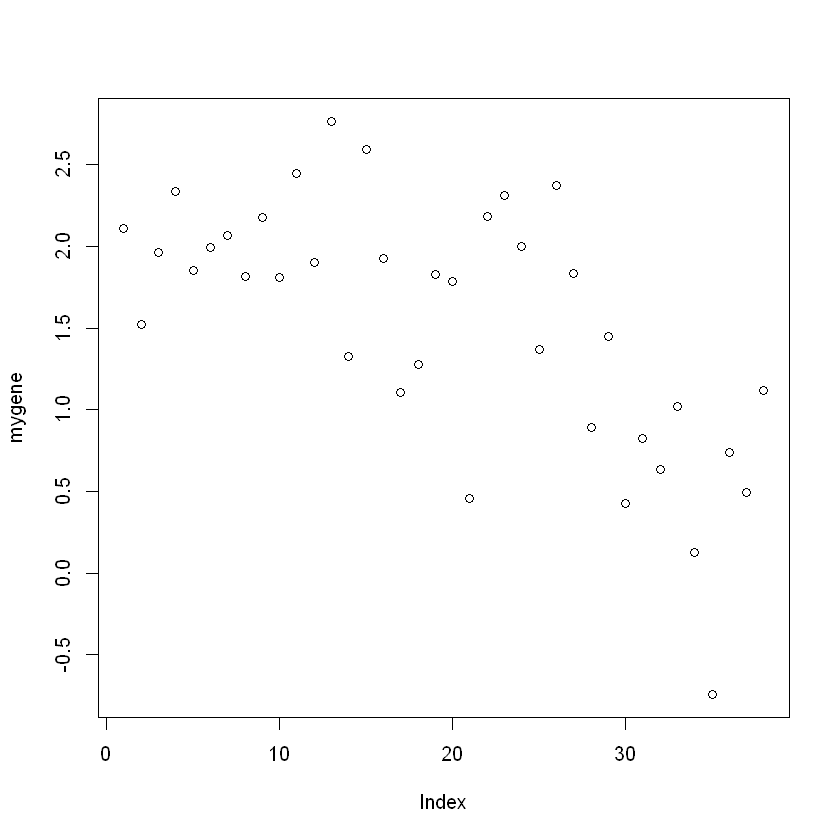

In [12]:
mygene <- golub[1042, ]

plot(mygene)

Good, but we can improve the plot


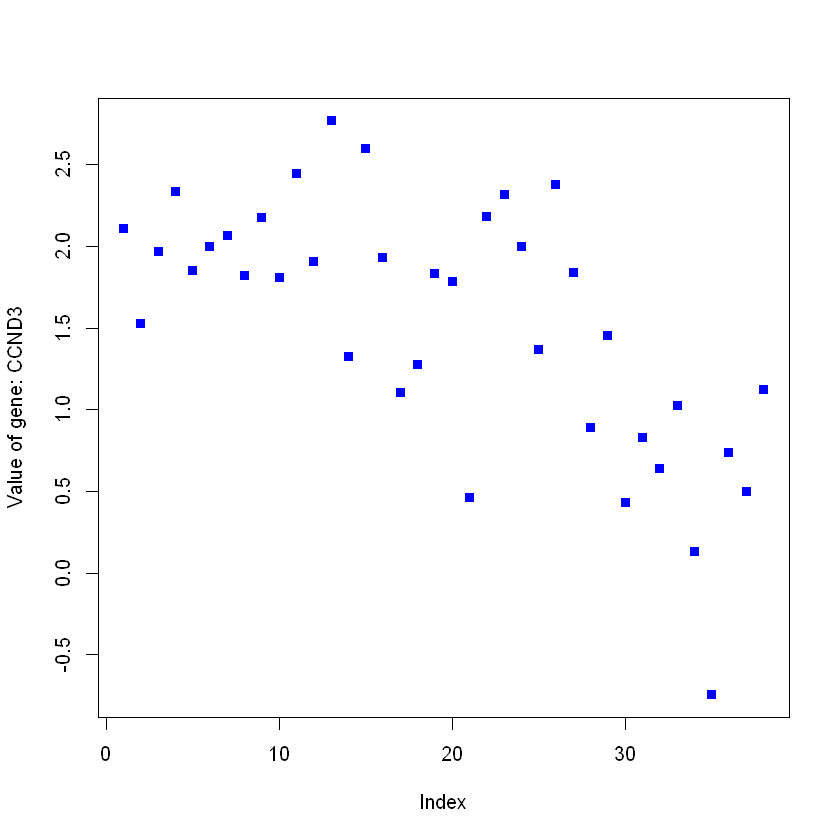

In [13]:
plot(mygene, pch = 15, col = 'blue', ylab = 'Value of gene: CCND3')

### 2\. Gene expression between patient 1 (ALL) and patient 38 (AML) 

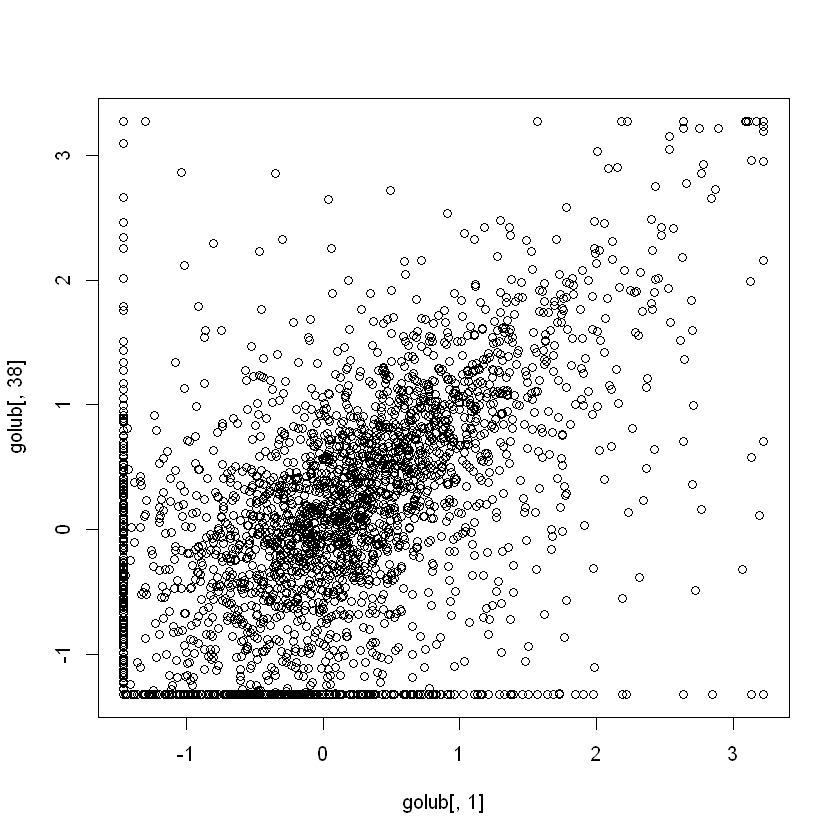

In [14]:
plot(golub[,1], golub[,38])

Adding diagonal lines to the plot and changing axes labels


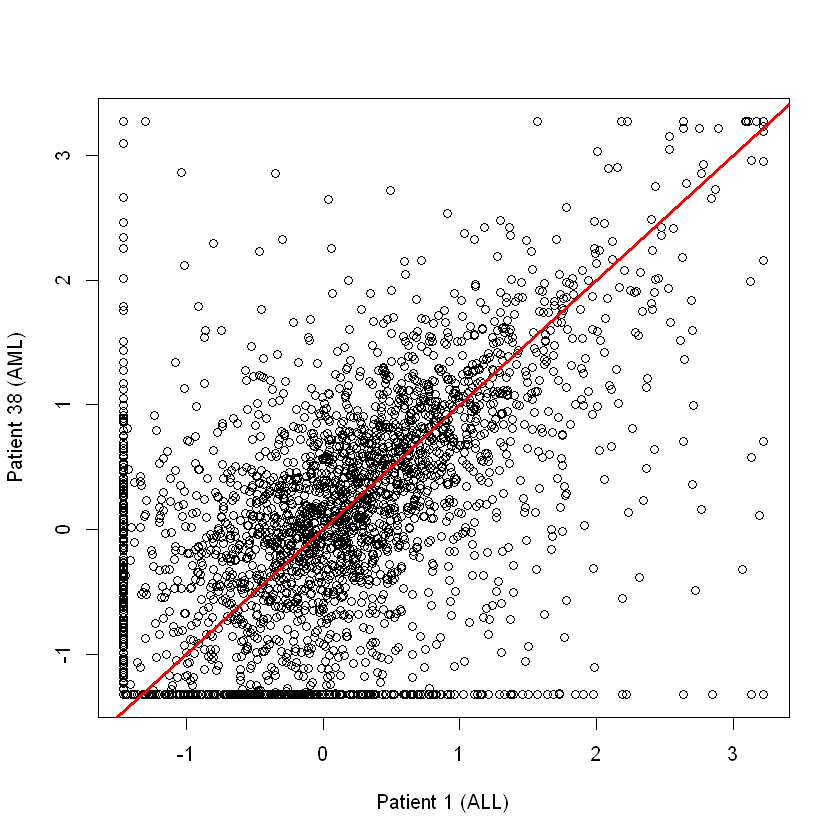

In [15]:
plot(golub[,1], golub[,38], xlab = 'Patient 1 (ALL)', ylab = 'Patient 38 (AML)') 
abline(a = 0, b = 1, col = "red", lwd =3)

### 3\. Scatter plots to detect independence


In [16]:
mysamplist <- golub[, c(1:15)]
colnames(mysamplist) = c(1:15)

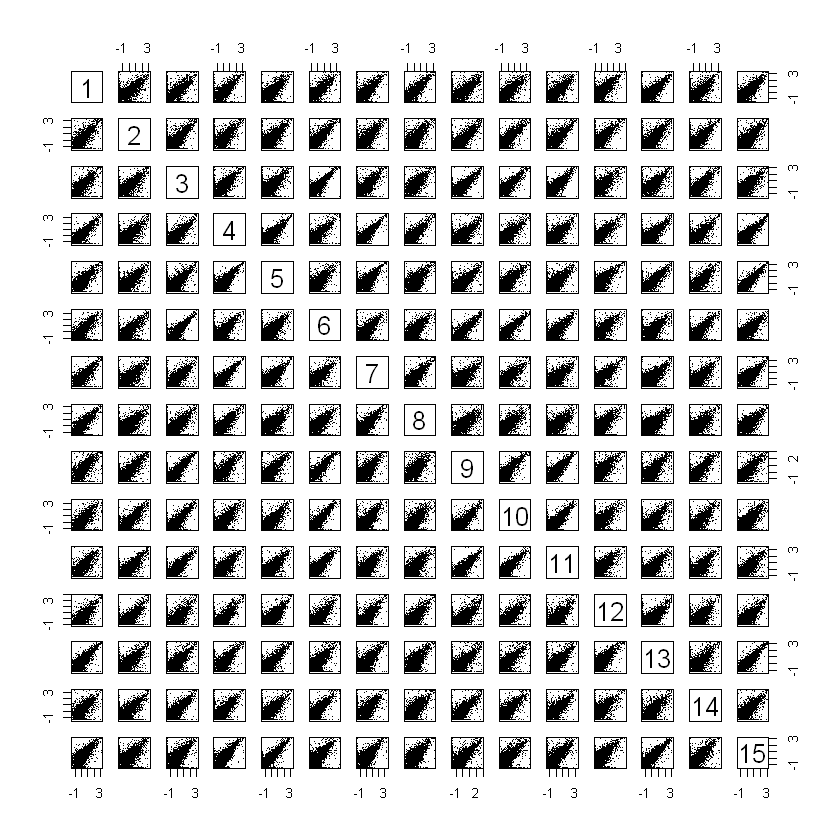

In [17]:
plot(as.data.frame(mysamplist), pch='.')

### 4\. Bar plot of 4 cycline genes expression values in 3 ALL and AML patients

In [18]:
mygenelist <- golub[c(85, 1042, 1212, 2240), c(1:3, 36:38)]

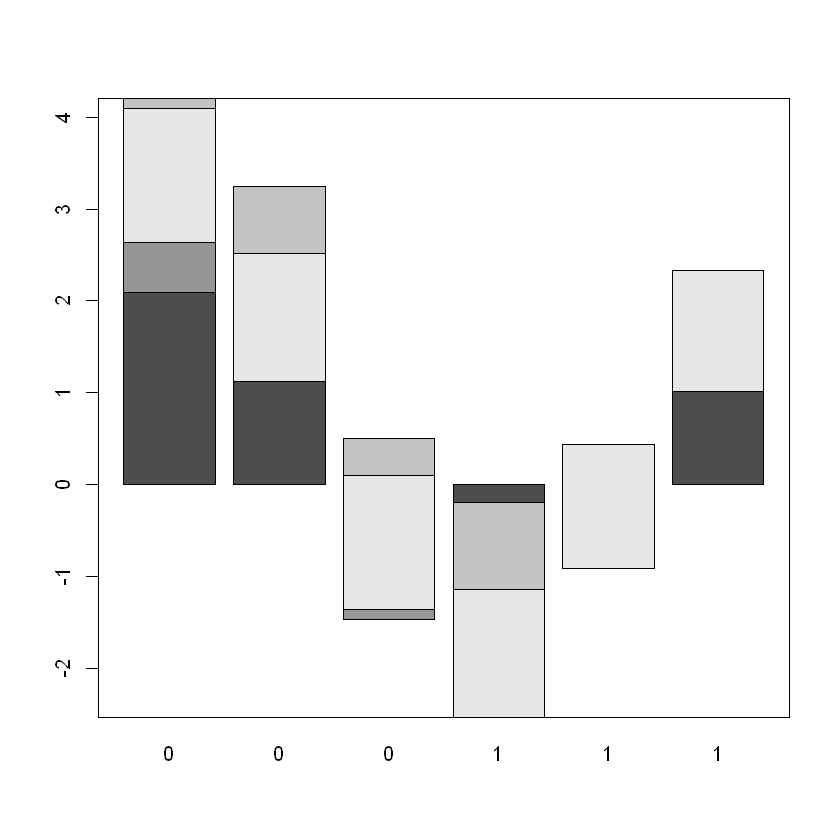

In [19]:
barplot(mygenelist)
box()

Let's have a look at the `barplot` arguments:


In [20]:
?barplot

We are going to focus on only a few of the histgram arguments:
- `beside`: `TRUE` for the bars to be displayed as justapoxed bars, `FALSE` for stacked bars
- `horiz` : `FALSE` bars displayed vertically with the first bar to the left, `TRUE` bars are displayed horizontally with the first at the bottom.
- `ylim`, `xlim` :  limits for the y and x axes
- `col`: colour choices

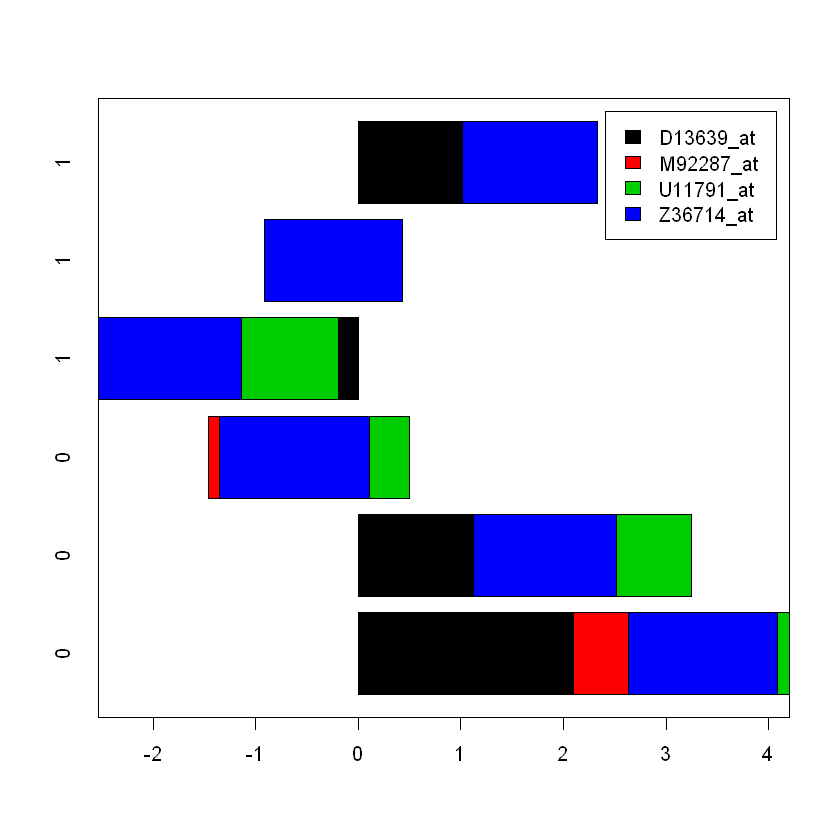

In [21]:
barplot(mygenelist, horiz = TRUE, col = (c(1:4)), legend = TRUE)
box()

You can also use the barplots to represent the mean and standard error 

### 5\. Plotting the mean

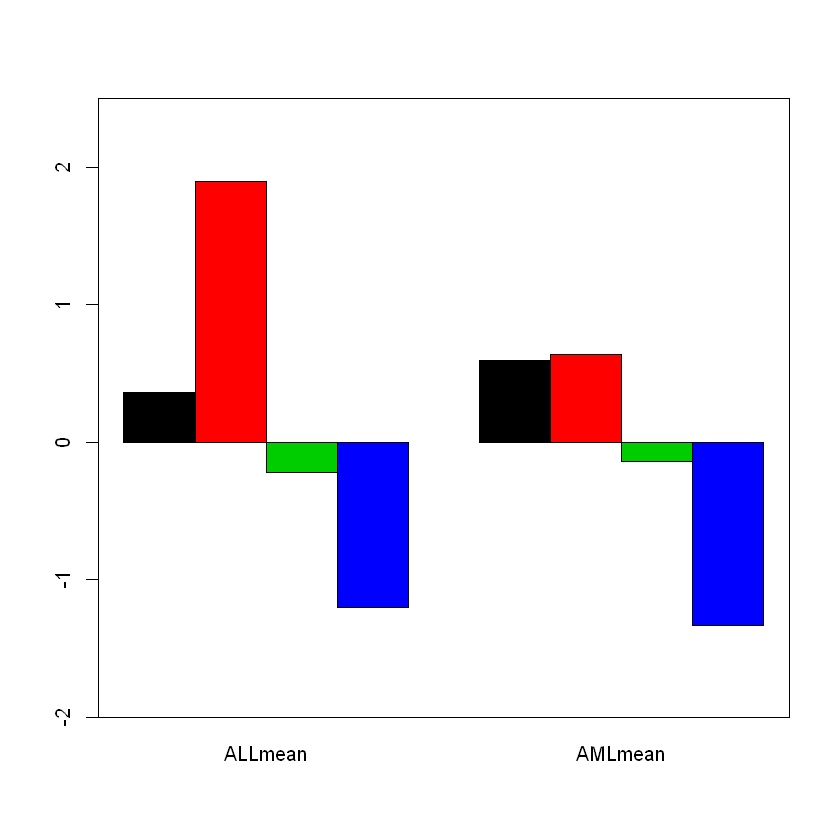

In [22]:
# Calculating the mean
ALLmean <- rowMeans(golub[c(85,1042,1212,2240),c(1:27)])
AMLmean <- rowMeans(golub[c(85,1042,1212,2240),c(28:38)])

# Aggregating the mean sets
dataheight <- cbind(ALLmean, AMLmean)

# Plotting 
barx <- barplot(dataheight, beside=T, horiz=F, col=c(1:4), ylim=c(-2,2.5))
box()

### 6\. Adding error bars to the previous plot

In [23]:
# Calculating the SD
ALLsd <- apply(golub[c(85,1042,1212,2240),c(1:27)], 1, sd)
nALL=length(c(1:27))
AMLsd <- apply(golub[c(85,1042,1212,2240),c(28:38)], 1, sd)
nAML=length(c(28:38))

datasd <- cbind(ALLsd, AMLsd)
datase <- cbind(ALLsd/sqrt(nALL), AMLsd/sqrt(nAML))


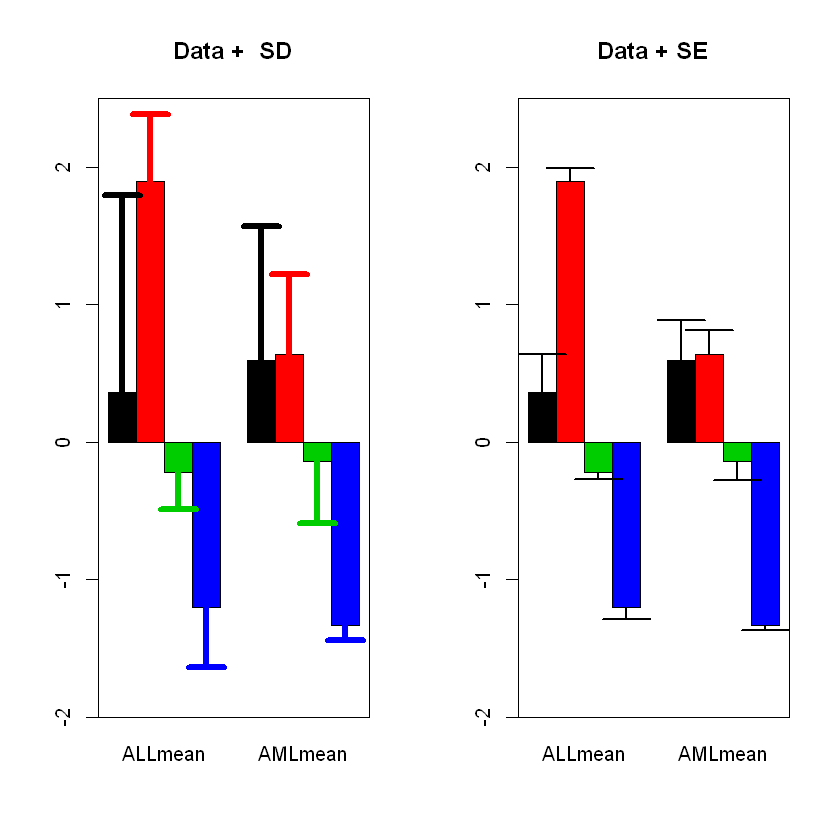

In [24]:
# creating a panel of 2 plots displayed in 1 row
par(mfrow = c(1,2))

# Plot with the SD
datasdend<-abs(dataheight) + abs(datasd)
datasdend[c(3,4),] = - datasdend[c(3,4),]
barx <- barplot(dataheight, beside=T, horiz=F, col=c(1:4), ylim=c(-2,2.5),
               main = 'Data +  SD')

arrows(barx, dataheight, barx, datasdend, angle=90, lwd=5, length=0.15, col=c(1:4))
box()

# Plot with the se: error associated to the mean!
datasdend<-abs(dataheight) + abs(datase)
datasdend[c(3,4),] = -datasdend[c(3,4),]
barx <- barplot(dataheight, beside=T, horiz=F, col=c(1:4), ylim=c(-2,2.5),
               main = 'Data + SE')

arrows(barx, dataheight, barx, datasdend, angle=90, lwd=2, length=0.2, col=1)
box()

## 2. Exploring some types of plots


### Frequency table 
Discrete data occur when the values naturally fall into categories. A frequency table simply gives the number of occurrences within a category.

**Example 1.**
A gene consists of a sequence of nucleotides (A; C; G; T)

The number of each nucleotide can be displayed in a frequency table or a Pie plot.

The code below illustrates how to read the sequence "X94991.1" of the species homo
sapiens from GenBank, , to construct a pie from a frequency table of the four
nucleotides.

In [25]:
library('ape')

ERROR: Error in library("ape"): there is no package called 'ape'


In [26]:
v = read.GenBank(c("X94991.1"),as.character = TRUE)

pie(table(v$X94991.1))

ERROR: Error in eval(expr, envir, enclos): could not find function "read.GenBank"


### Stripcharts

An elementary method to visualize data is by using a so-called stripchart,
by which the values of the data are represented as e.g. small boxes
it is useful in combination with a factor that distinguishes members from
different experimental conditions or patients groups


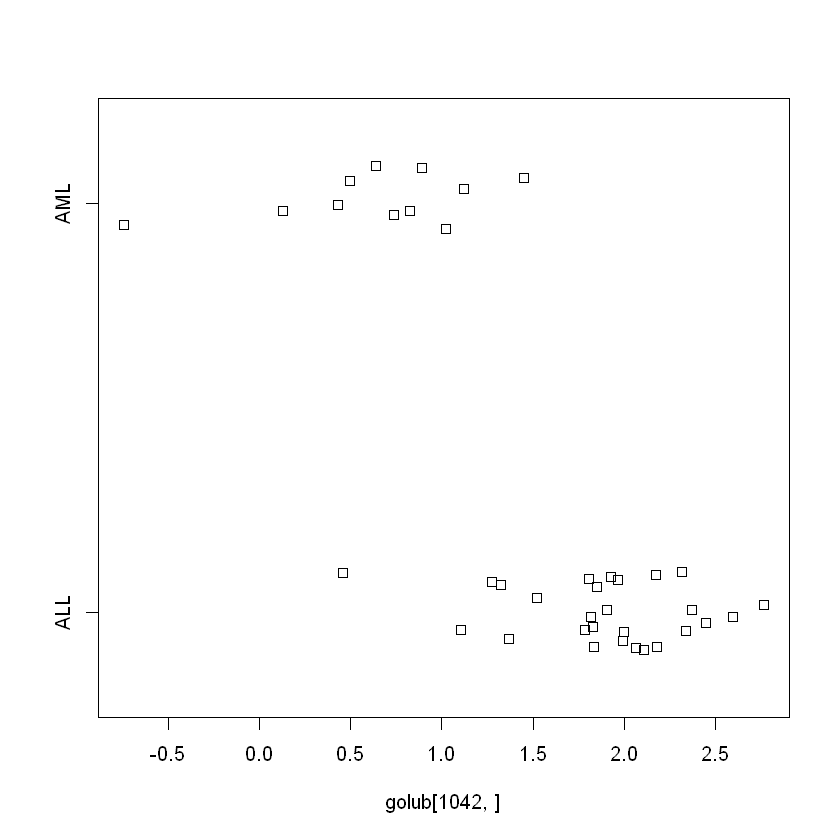

In [27]:
# data(golub, package = "multtest")
gol.fac <- factor(golub.cl,levels=0:1, labels= c("ALL","AML"))

stripchart(golub[1042,] ~ gol.fac, method = "jitter")


### Histograms 

Another method to visualize data is by dividing the range of data values into
a number of intervals and to plot the frequency per interval as a bar. Such
a plot is called a histogram.

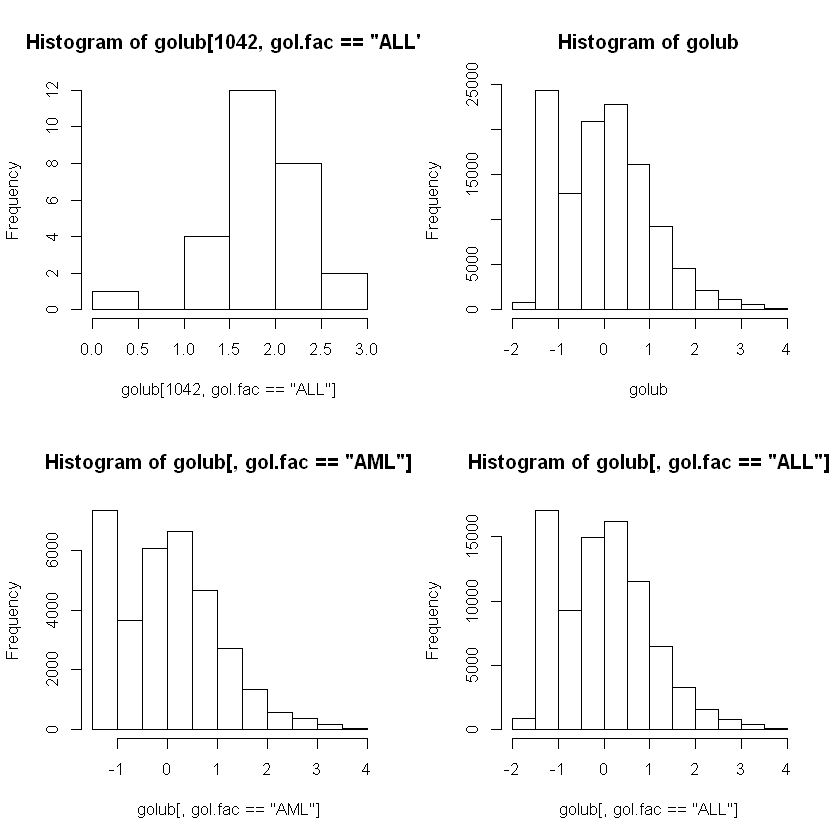

In [28]:
par(mfrow=c(2,2))

hist(golub[1042, gol.fac == "ALL"])
hist(golub,breaks=10)

hist(golub[, gol.fac == "AML"],breaks=10)
hist(golub[, gol.fac == "ALL"],breaks=10)

### BOXPLOTS

A popular method to display data is by
drawing a box around the Ørst and the third quartile (a bold line segment                                                     for the median), and the smaller line segments (whiskers) for the smallest and
the largest data values. Such a data display is known as a box-and-whisker
plot

In [29]:
# Sort the values of one gene
x <- sort(golub[1042, gol.fac=="ALL"], decreasing = FALSE)
x[1:5]

0       0       0       0       0 
0.45827 1.10546 1.27645 1.32551 1.36844

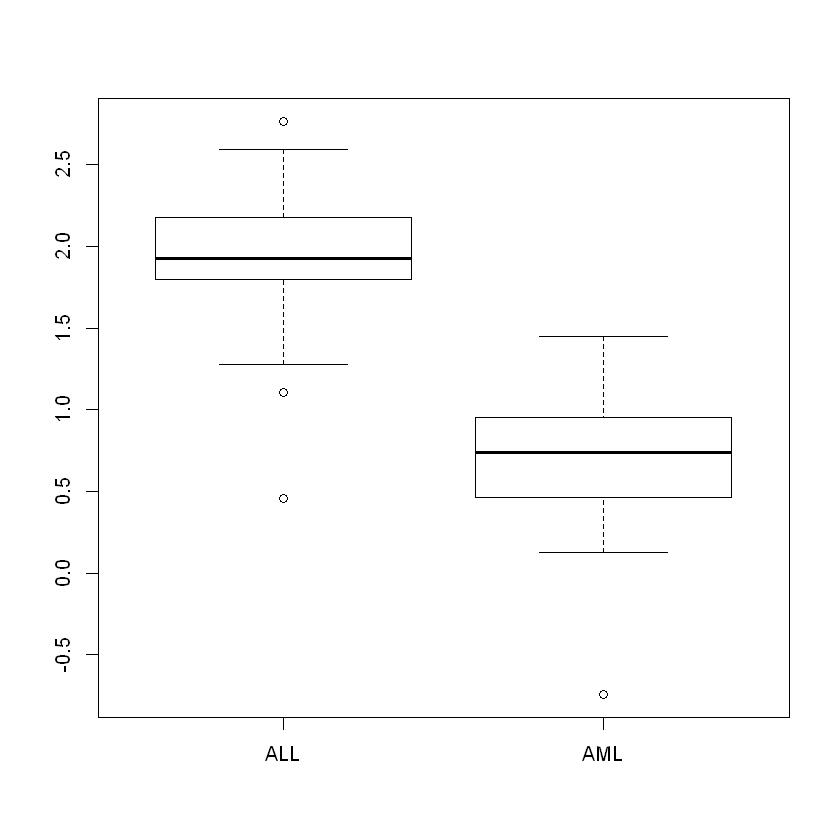

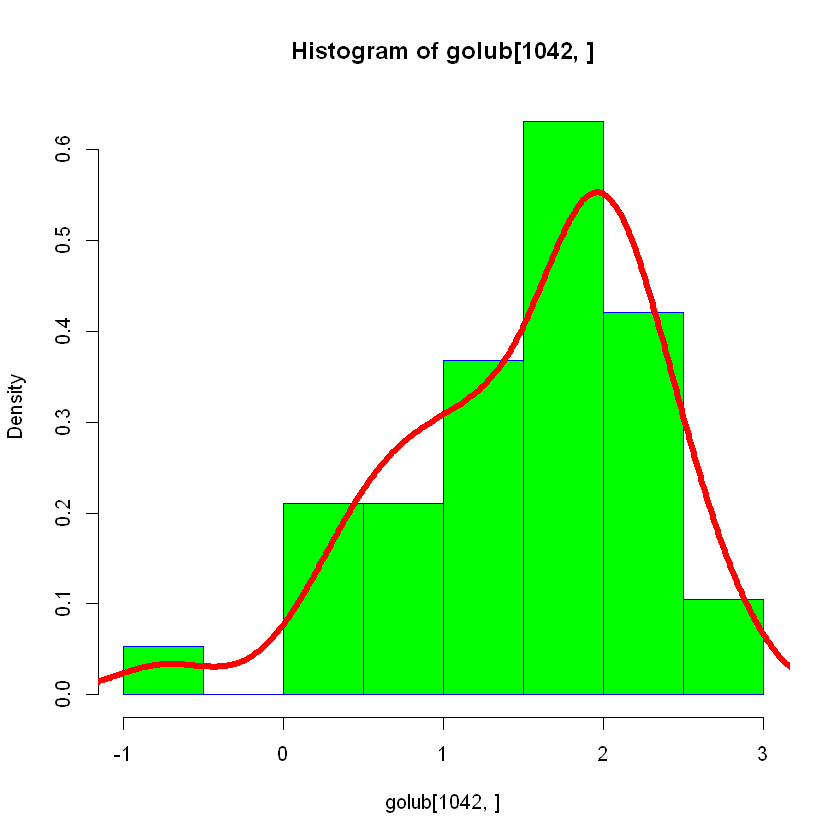

In [30]:
# A view on the distribution of the expression values of the
# ALL and the AML patients on gene CCND3 Cyclin D3 can be obtained by
# constructing two separate boxplots adjacent to one another. 
par(mfrow=c(1,1))
boxplot(golub[1042,] ~ gol.fac)

hist(golub[1042,], col="green", border=4, breaks=6, freq=F)
lines(density(golub[1042,]), col="red", lwd=5)

Observing the distribution of all gene expression values in all 38 patients

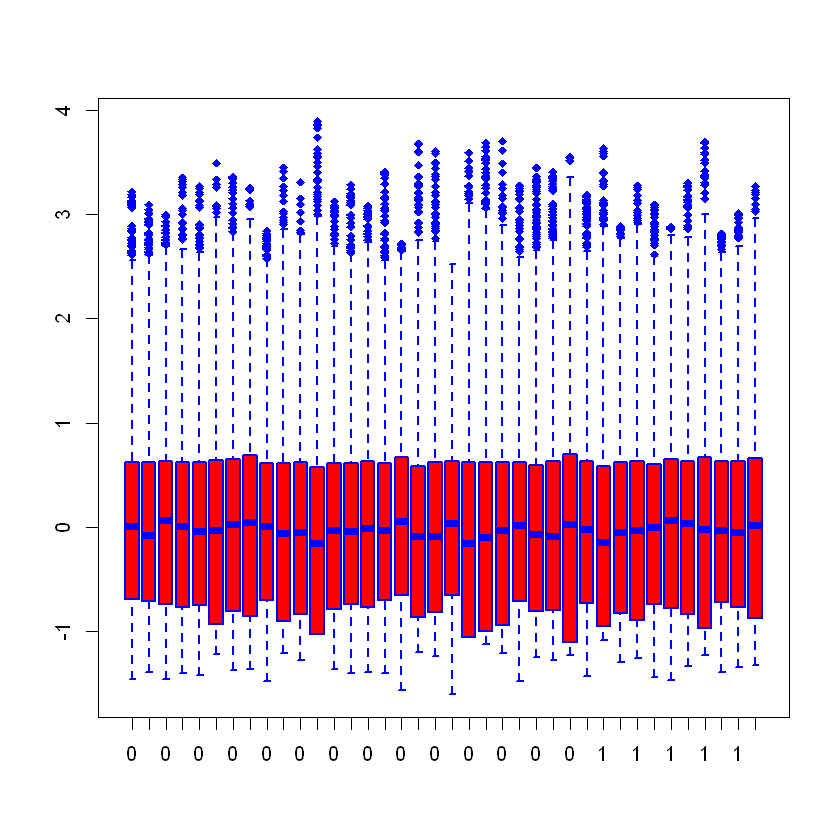

In [31]:

boxplot(golub, col=2, lwd=2, border="blue", pch=18)


Now to compute the exact values for the quartiles we need a sequence running from 0.00 to 1.00 with steps equal to 0.25

In [32]:
pvec <- seq( 0, 1, 0.25)
quantile(golub[1042, gol.fac =='ALL'], pvec)

0%      25%      50%      75%     100% 
0.458270 1.796065 1.927760 2.178705 2.766100